# k-means clustering (batch solution)

####### For K=2 #######
The final value for the 0-th prototype is [-0.09881343  0.10693606  0.23594851 -0.86530571 -0.86077893 -0.040197  ]
The final value for the 1-th prototype is [ 0.10393886 -0.11248281 -0.24818709  0.91018888  0.90542729  0.04228201]





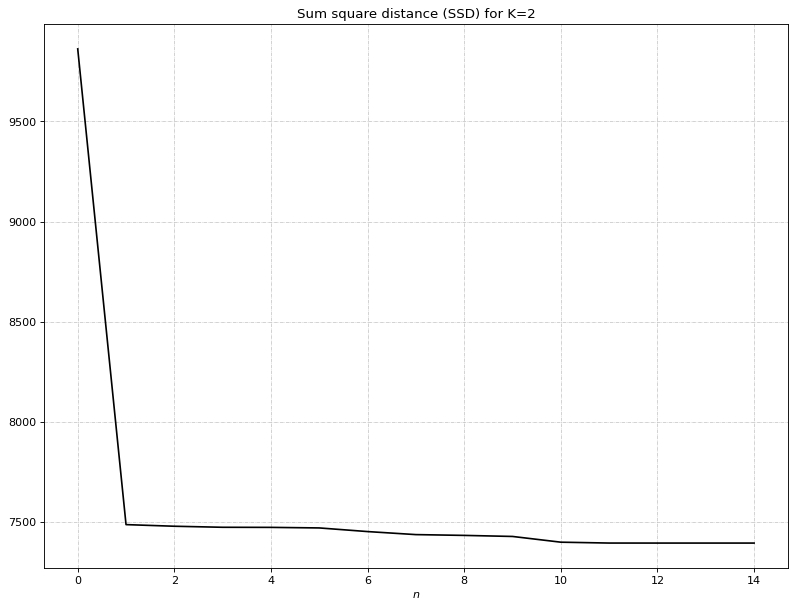

####### For K=3 #######
The final value for the 0-th prototype is [-0.06035058  0.1009536   0.25220707 -0.89591957 -0.8978359  -0.01369267]
The final value for the 1-th prototype is [ 0.14454672 -0.11714346 -0.24341519  0.92227917  0.91451458  0.94369041]
The final value for the 2-th prototype is [-0.04005681 -0.07523286 -0.24413541  0.80152986  0.81435543 -1.0485005 ]





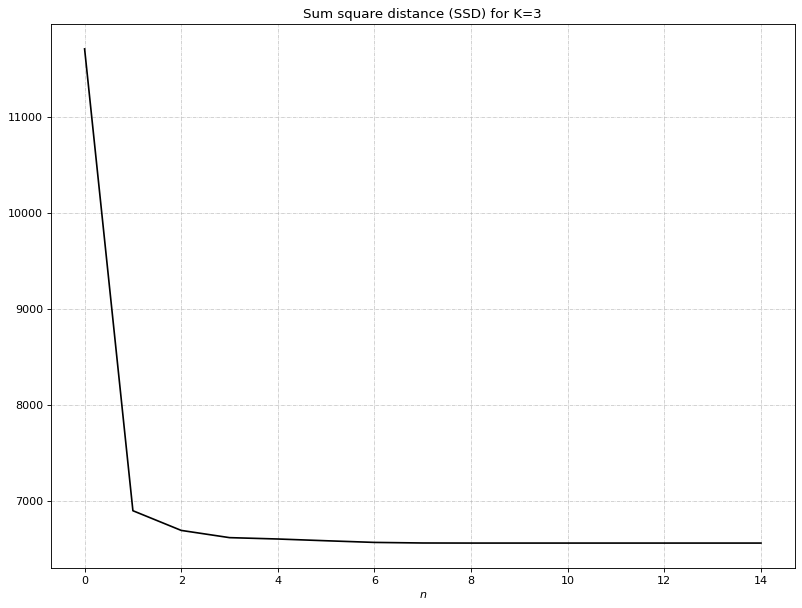

####### For K=4 #######
The final value for the 0-th prototype is [-6.62929191  1.81957047  0.53965678 -0.34469974 -0.23333812 -0.68652337]
The final value for the 1-th prototype is [ 0.13790302 -0.07706383 -0.24465237  0.81541557  0.82429477 -1.04839713]
The final value for the 2-th prototype is [ 0.06268099  0.04488534  0.23744854 -0.90061212 -0.9039538  -0.00251543]
The final value for the 3-th prototype is [ 0.14454672 -0.11668391 -0.24369825  0.92472823  0.91676626  0.94354158]





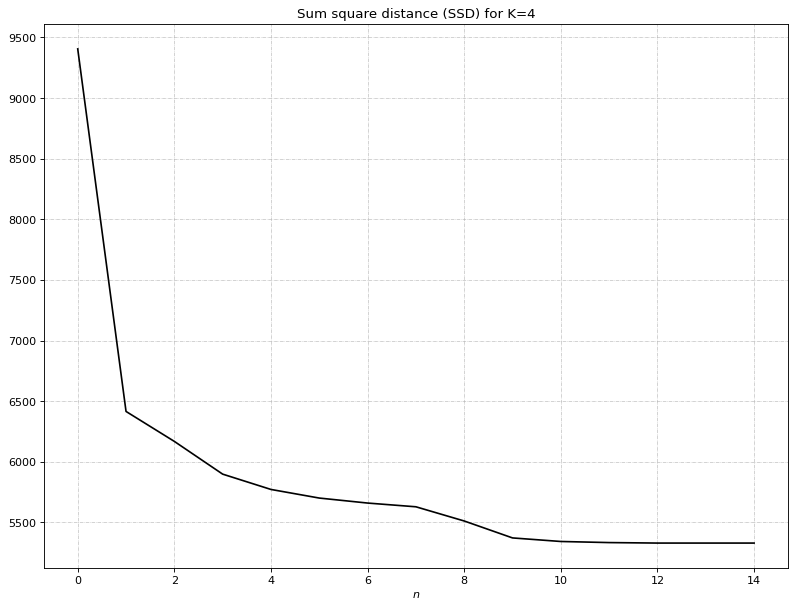

####### For K=5 #######
The final value for the 0-th prototype is [-0.34982051  1.59854398  4.86133401 -1.36267869 -1.32591481 -0.75793369]
The final value for the 1-th prototype is [ 0.1347911  -0.04674418 -0.25383655  1.15320278  1.1547517  -1.04682704]
The final value for the 2-th prototype is [ 0.14454672 -0.12756397 -0.24618775  0.94415522  0.93101967  0.94279096]
The final value for the 3-th prototype is [ 0.03616616  0.06221923  0.03489886 -0.82646747 -0.84007449  0.96287353]
The final value for the 4-th prototype is [-0.20462765 -0.02455097 -0.01104115 -0.64764524 -0.62793353 -1.0408942 ]





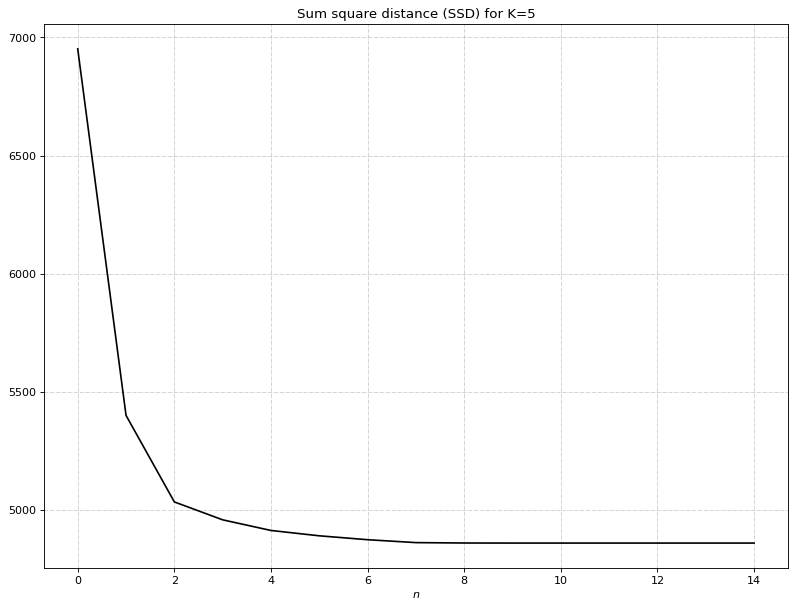

In [17]:
from numpy import genfromtxt, empty, array, argmin, amin, mean, arange, zeros, std
from numpy.linalg import norm
from numpy.random import permutation
import matplotlib.pyplot as plt

X = genfromtxt('./data/datasetTC3.dat', dtype='float64', delimiter='\t').T
# Normalize the data
X = (X - mean(X, 1)[:,None])/std(X, 1, ddof=1)[:,None]

p, N = X.shape
# number of iterations
N_iter = 15
# sum square distance (SSD)
SSD = empty(N_iter)
# set of all partitions
V = {}

all_K = range(2,6)
for K in all_K:
    i = permutation(N)
    # initialize W with k random instances
    W = X[:, i[:K]]
    # the minimum distance for the n-th vector and its index
    min_dist, min_disti = empty(N), empty(N, dtype=int)
    for n_iter in range(N_iter):
        # for each instance vector x
        for n in range(N):
            # all distancies from all vectors to the k-th prototype
            dist2w = array([norm(X[:,n] - W[:,k]) for k in range(K)])
            # index of the closest prototype, w, to the n-th vector
            min_dist[n], min_disti[n] = amin(dist2w), argmin(dist2w)

        # sum up all 
        SSD[n_iter] = sum(min_dist**2)

        # partition into K sets
        for k in range(K):
            # get all all instances that have the minimum distance to the k-th prototype
            V[k] = X[:, min_disti==k]
            # update the prototype
            W[:,k] = mean(V[k], axis=1)
        
    fig = plt.figure(figsize=(12, 9), dpi=80)
    ax = fig.gca()
    ax.set_axisbelow(True)
    ax.plot(SSD, 'k')
    ax.grid(True, linestyle='-.', linewidth=.5)
    plt.xlabel(r'$n$')
    plt.title(f'Sum square distance (SSD) for K={K}')
    print(f'####### For K={K} #######')
    for k in range(K):
        print(f'The final value for the {k}-th prototype is {W[:,k]}')
    print('\n\n')
    plt.show()

# K-mean clustering (sequential solution)

####### For K=2 #######
The final value for the 0-th prototype is [9.95662225e+01 4.12980374e+00 1.07246302e+03 2.22636513e+00
 2.27304933e+00 8.88603763e+06]
The final value for the 1-th prototype is [9.86288388e+01 4.29416712e+00 1.89268288e+03 2.09458668e+00
 2.16990928e+00 2.44185380e+05]



####### For K=3 #######
The final value for the 0-th prototype is [9.96244955e+01 6.08559773e+00 1.92777874e+03 1.98441601e+00
 2.07688427e+00 7.92089532e+05]
The final value for the 1-th prototype is [9.83846947e+01 3.90678780e+00 1.90892796e+03 2.11140731e+00
 2.18377099e+00 1.22928412e+05]
The final value for the 2-th prototype is [9.96228854e+01 4.09186319e+00 1.00928973e+03 2.24053712e+00
 2.28482015e+00 9.35405655e+06]



####### For K=4 #######
The final value for the 0-th prototype is [9.87500000e+01 3.60702381e+00 3.93654944e+02 3.03576996e+00
 3.04510035e+00 8.00088245e+06]
The final value for the 1-th prototype is [9.86231767e+01 4.32589304e+00 1.91255400e+03 2.08697989e+00
 2.163210

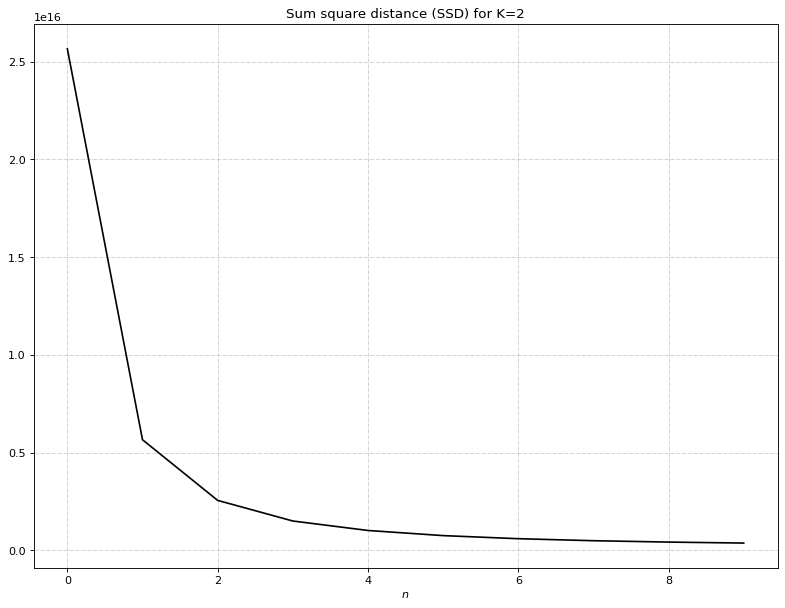

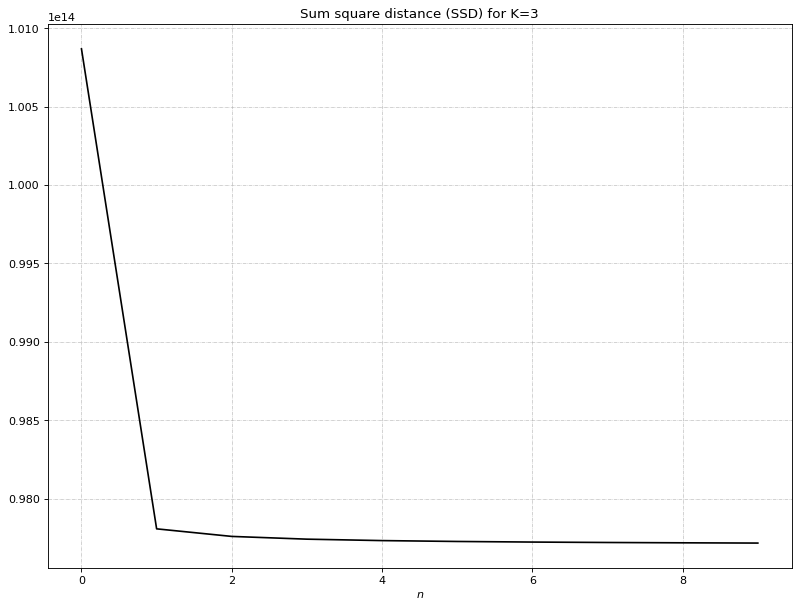

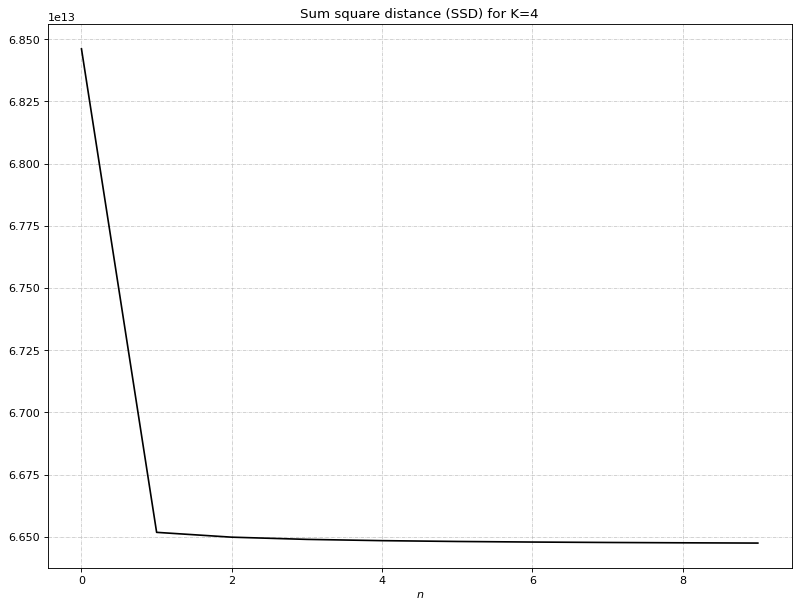

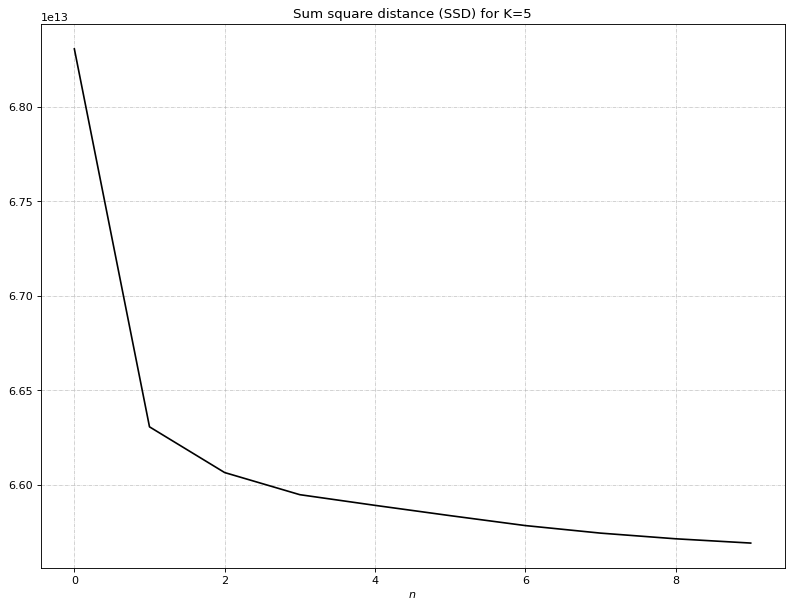

In [6]:
from numpy import genfromtxt, empty, array, argmin, amin, mean, arange
from numpy.linalg import norm
from numpy.random import permutation
import matplotlib.pyplot as plt

X = genfromtxt('./data/datasetTC3.dat', dtype=float, delimiter='\t').T

all_K = range(2,7)
p, N = X.shape
# number of iterations
N_iter = 10
# sum square distance (SSD)
SSD = empty(N_iter)
# set of all partitions
V = {}

min_dist = empty(N)

all_K = range(2,6)
for K in all_K:
    i = permutation(N)
    # initialize W with k random instances
    W = X[:, i[:K]]
    C = zeros(K)
    for n_iter in range(N_iter):
        # for each instance vector x
        for n in range(N):
            # all distancies from all vectors to the k-th prototype
            dist2w = array([norm(X[:,n] - W[:,k]) for k in range(K)])
            # index of the closest prototype, w, to the n-th vector
            min_dist[n], min_disti[n] = amin(dist2w), argmin(dist2w)
            C[min_disti[n]] += 1
            # update equation
            alpha = 1/C[min_disti[n]]
            W[:,min_disti[n]] = (1 - alpha)*W[:,min_disti[n]] + alpha*X[:,n]

        # sum up all
        SSD[n_iter] = sum(min_dist**2)
        
    fig = plt.figure(figsize=(12, 9), dpi=80)
    ax = fig.gca()
    ax.set_axisbelow(True)
    ax.plot(SSD, 'k')
    ax.grid(True, linestyle='-.', linewidth=.5)
    plt.xlabel(r'$n$')
    plt.title(f'Sum square distance (SSD) for K={K}')
    print(f'####### For K={K} #######')
    for k in range(K):
        print(f'The final value for the {k}-th prototype is {W[:,k]}')
    print('\n\n')
plt.show()